In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import numpy as np

# Load dataset
df = pd.read_csv("dataset.csv")

# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Remove duplicates
df = df.drop_duplicates()

# Separate features & target variable
X = df.drop(columns=["label"])
y = df["label"]

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Get predictions
dt_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, dt_pred)
rms = np.sqrt(mean_squared_error(y_test, dt_pred))

# Display results
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, dt_pred))
print(f"Decision Tree RMS: {rms:.4f}")


Decision Tree Accuracy: 0.9917
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     52311
           1       0.99      0.99      0.99       424
           2       1.00      1.00      1.00      9894
           3       0.96      0.95      0.96      6416

    accuracy                           0.99     69045
   macro avg       0.98      0.98      0.98     69045
weighted avg       0.99      0.99      0.99     69045

Decision Tree RMS: 0.2720


In [3]:
# Train and test accuracy
train_pred = dt.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, dt_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Underfitting: both low → model too simple
# Overfitting: train high, test low → model too complex

Train Accuracy: 1.0000
Test Accuracy: 0.9917


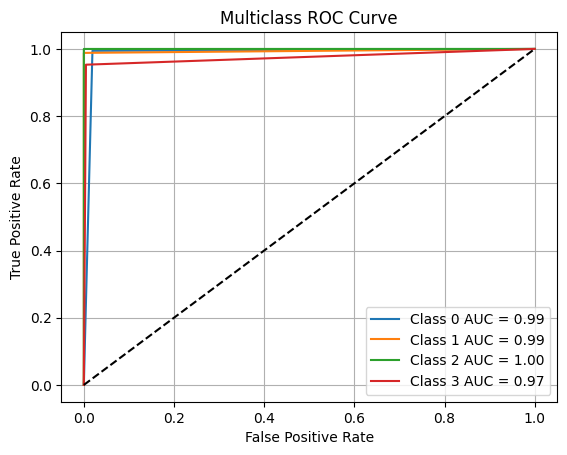

In [5]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

# Binarize output
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Split again with binarized y
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_scaled, y_bin, test_size=0.2, random_state=42)

# Train One-vs-Rest model
clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
clf.fit(X_train_bin, y_train_bin)

# Predict probabilities
y_score = clf.predict_proba(X_test_bin)

# Plot ROC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} AUC = {roc_auc:.2f}")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend()
plt.grid()
plt.show()



Feature Importances:
              Feature  Importance
0            balance    0.738985
3           block_id    0.193289
20       fee_per_kwu    0.052826
15  output_total_usd    0.002782
1           rec/sent    0.002577
7          lock_time    0.001782
11      output_count    0.001192
2             amount    0.001007
21   fee_per_kwu_usd    0.000867
19    fee_per_kb_usd    0.000709
22         cdd_total    0.000672
5             weight    0.000461
12       input_total    0.000456
13   input_total_usd    0.000442
4               size    0.000435
17           fee_usd    0.000396
18        fee_per_kb    0.000365
14      output_total    0.000331
16               fee    0.000305
10       input_count    0.000056
6            version    0.000035
9        has_witness    0.000031
8        is_coinbase    0.000000


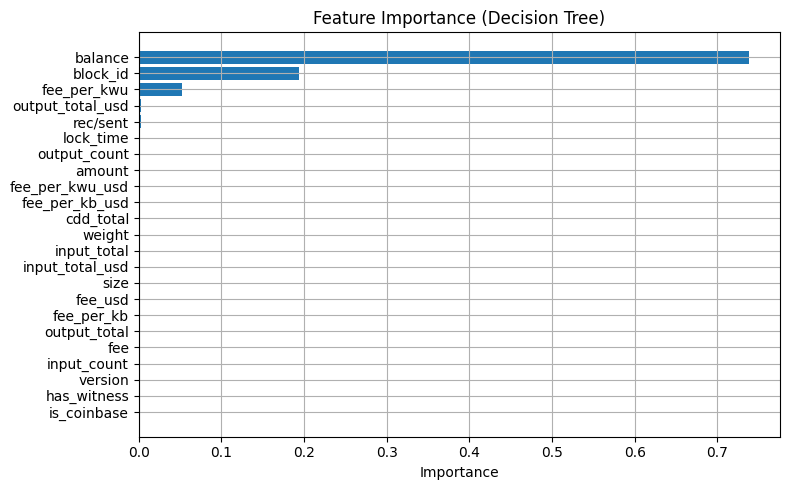

In [6]:
# Feature importance
importances = dt.feature_importances_
features = df.drop(columns=["label"]).columns

# Display sorted importance
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances:\n", importance_df)

# Optional: plot
plt.figure(figsize=(8, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance")
plt.title("Feature Importance (Decision Tree)")
plt.gca().invert_yaxis()
plt.grid()
plt.tight_layout()
plt.show()
